# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [ ]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [ ]:
# Import essential libraries
import os
import zipfile
import gdown
import glob
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Load the dataset.

In [ ]:
# Load and unzip the dataset

# google drive dataset link
#https://drive.google.com/file/d/1hvRavwRCDT_At-1Z-LjPTv4IRW7xOzkM/view?usp=drive_link

file_id = "1hvRavwRCDT_At-1Z-LjPTv4IRW7xOzkM"
url = f"https://drive.google.com/uc?id={file_id}"
output = "data.zip"

# downloading it in the local storage
gdown.download(url, output, quiet=False, use_cookies=True)

zip_path = "/content/data.zip"
extract_path = "/content/"  # You can set this to any path under /content

# unzipping the file in the /content path
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


Downloading...
From (original): https://drive.google.com/uc?id=1hvRavwRCDT_At-1Z-LjPTv4IRW7xOzkM
From (redirected): https://drive.google.com/uc?id=1hvRavwRCDT_At-1Z-LjPTv4IRW7xOzkM&confirm=t&uuid=843b646f-fd4d-4b14-9f59-17de20b39bf1
To: /content/data.zip
100%|██████████| 501M/501M [00:06<00:00, 75.8MB/s]


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

*Let* us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [ ]:
# Create a function to load the raw images

def load_raw_images(filepath):
  img=Image.open(filepath)
  img =img.convert("RGB")
  return img


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [ ]:
# Get the images and their labels
data_dir = "/content/data"
images = {}
labels = sorted([subdir for subdir in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir,subdir))])
for label in labels:
  images[label] = []  # initialize list
  for image in os.listdir(os.path.join(data_dir, label)):
    images[label].append(load_raw_images(os.path.join(data_dir, label, image)))

print(images)

{'Cardboard': [<PIL.Image.Image image mode=RGB size=256x256 at 0x7C1E53776D10>, <PIL.Image.Image image mode=RGB size=256x256 at 0x7C1E527A5790>, <PIL.Image.Image image mode=RGB size=256x256 at 0x7C1E52924910>, <PIL.Image.Image image mode=RGB size=256x256 at 0x7C1E51AFB410>, <PIL.Image.Image image mode=RGB size=256x256 at 0x7C1E51AFBA10>, <PIL.Image.Image image mode=RGB size=256x256 at 0x7C1E51AFBD50>, <PIL.Image.Image image mode=RGB size=256x256 at 0x7C1E51AFB3D0>, <PIL.Image.Image image mode=RGB size=256x256 at 0x7C1E51AFBDD0>, <PIL.Image.Image image mode=RGB size=256x256 at 0x7C1E537BC4D0>, <PIL.Image.Image image mode=RGB size=256x256 at 0x7C1E51AFBE10>, <PIL.Image.Image image mode=RGB size=256x256 at 0x7C1E51B04390>, <PIL.Image.Image image mode=RGB size=256x256 at 0x7C1E51B045D0>, <PIL.Image.Image image mode=RGB size=256x256 at 0x7C1E52924AD0>, <PIL.Image.Image image mode=RGB size=256x256 at 0x7C1E537BCC50>, <PIL.Image.Image image mode=RGB size=256x256 at 0x7C1E528F4D90>, <PIL.Image

Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

In [ ]:
# Visualise Data Distribution

# calculate the frequency of all categories/labels

category_count = {key: len(value) for key,value in images.items()}
category_count

{'Cardboard': 540,
 'Food_Waste': 1000,
 'Glass': 750,
 'Metal': 1000,
 'Other': 1010,
 'Paper': 1030,
 'Plastic': 2295}

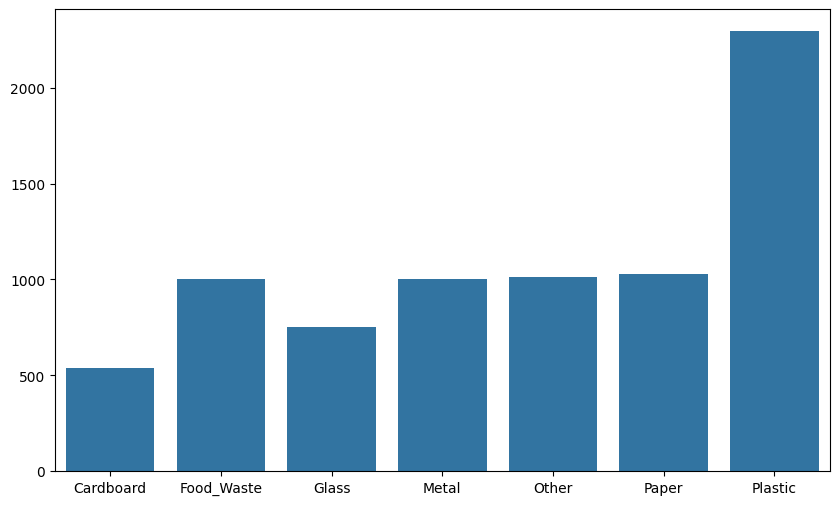

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=category_count, x=category_count.keys(), y=category_count.values())
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

Category :  Cardboard


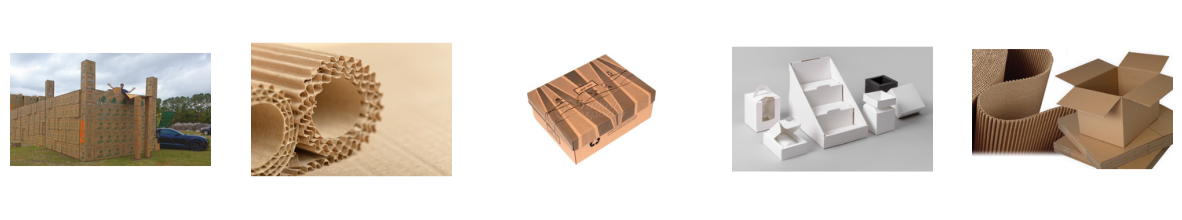

Category :  Food_Waste


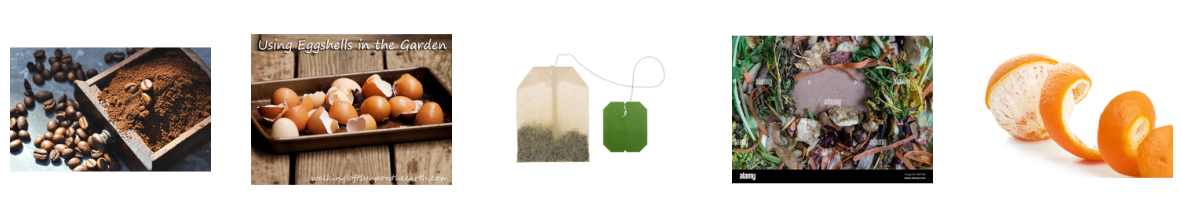

Category :  Glass


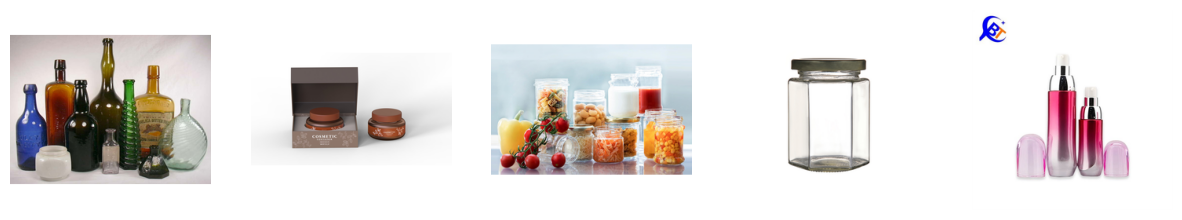

Category :  Metal


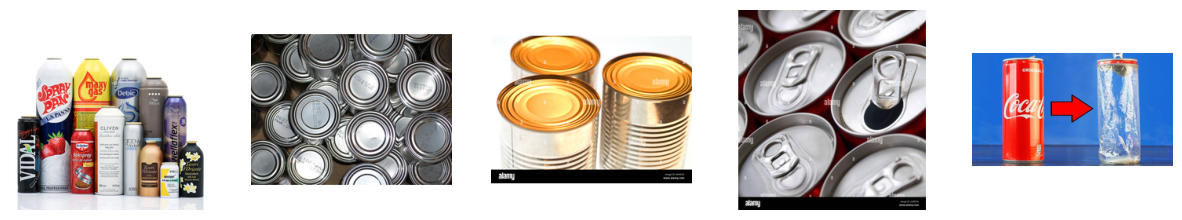

Category :  Other


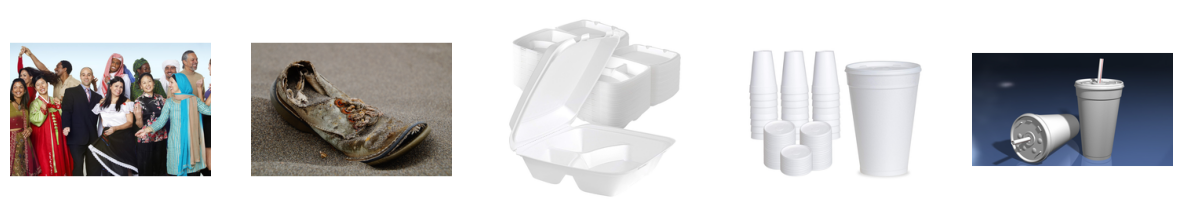

Category :  Paper


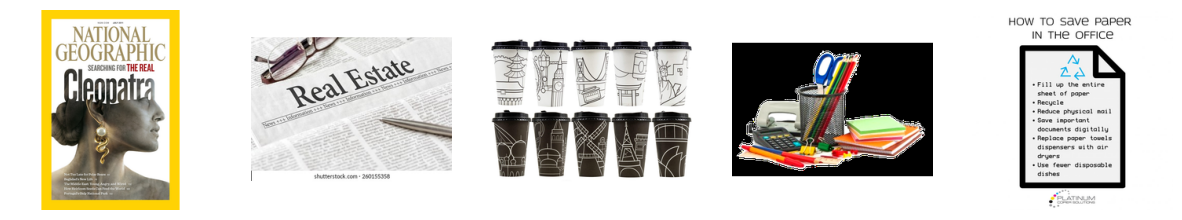

Category :  Plastic


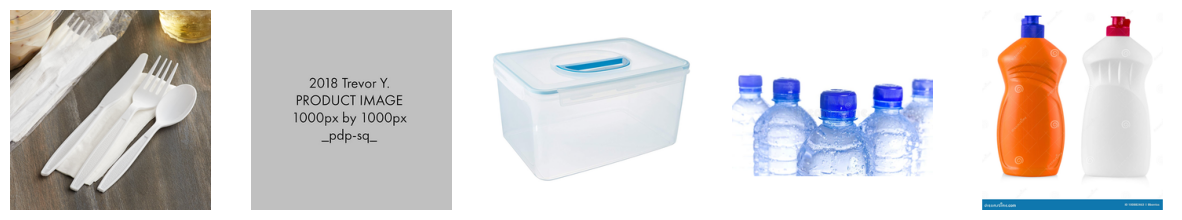

In [ ]:
# Visualise Sample Images (across different labels)

def visualize_images(images):
  for label, img_list in images.items():
    print ("Category : ", label)
    plt.figure(figsize = (15,3))
    for idx in range(0,5):
      plt.subplot(1, 5, idx + 1)
      plt.imshow(img_list[idx]);
      plt.axis("off")
    plt.show()

visualize_images(images)

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

Category :  Cardboard


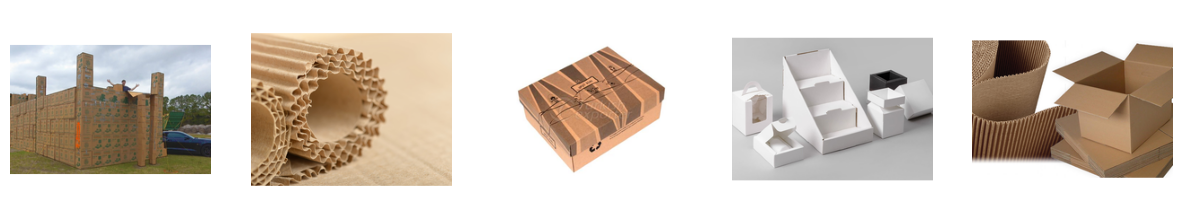

Category :  Food_Waste


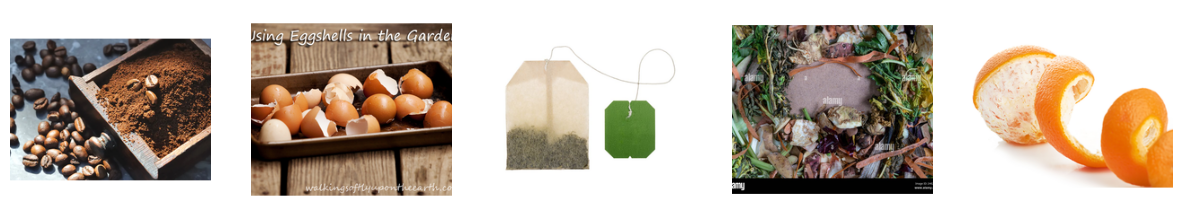

Category :  Glass


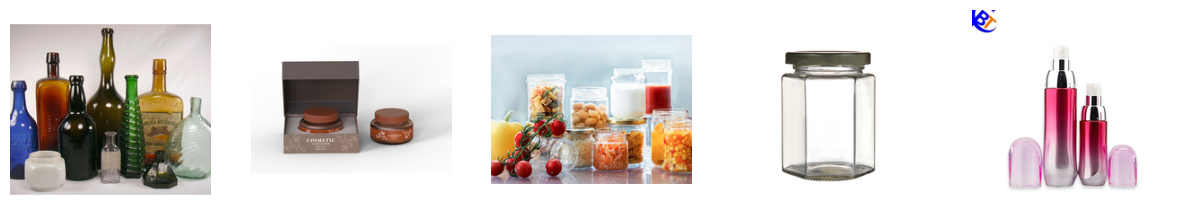

Category :  Metal


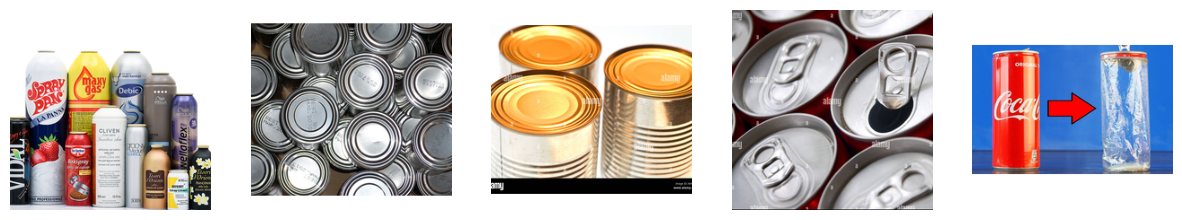

Category :  Other


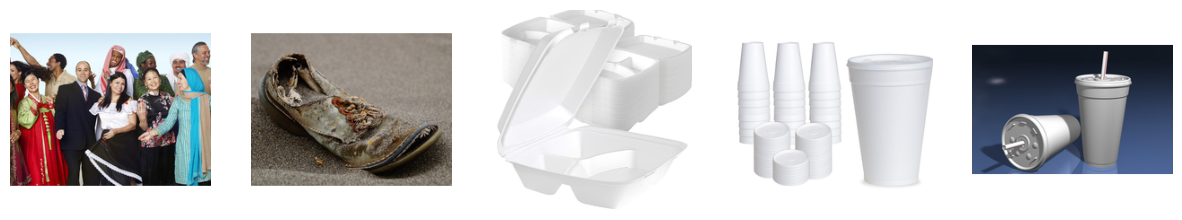

Category :  Paper


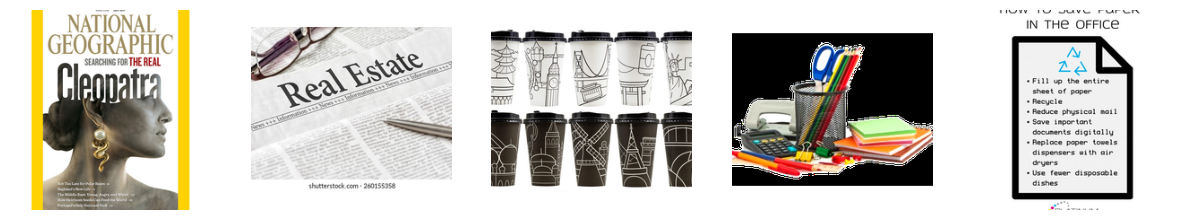

Category :  Plastic


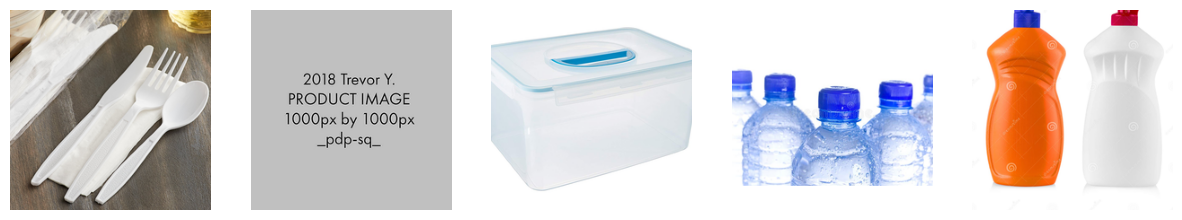

In [ ]:
# Resize the image dimensions

# although all images are of same size but we see in sample images, the visual area is different in every image.
# centr cropping the images will have the details in the complete image

cropped_images = {}

def center_crop(img, size=(128, 128)):
    width, height = img.size
    new_width, new_height = size

    left = (width - new_width) // 2
    top = (height - new_height) // 2
    right = left + new_width
    bottom = top + new_height

    return img.crop((left, top, right, bottom))

for label, img_list in images.items():
  cropped_images[label] = []
  for img in img_list:
    image = center_crop(img, size=(224,224))
    cropped_images[label].append(image)

images = cropped_images
visualize_images(images)

### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [ ]:
# Encode the labels suitably

# prepare a dataset in form of label and image tuple
labels_arr = []
images_arr = []

for label, image_lst in cropped_images.items():
  for img in image_lst:
    labels_arr.append(label)
    images_arr.append(img)

labelEncoder = LabelEncoder()
#labels_ds = [label for _,label in dataset]
encoded_labels = labelEncoder.fit_transform(labels_arr)

# keeping label mapping for future reference.
label_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))




### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [ ]:
# Assign specified parts of the dataset to train and validation sets
X = np.stack(images_arr)
y = np.array(encoded_labels)

# 15% test set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, stratify=y, random_state=42)



In [ ]:
# Normalize the image pixel values (0-1)
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow(X_train, y_train, batch_size=32)
test_generator = datagen.flow(X_test, y_test, batch_size=32)

train_len = len(X_train)
test_len = len(X_test)
X_train_shape = X_train.shape[1:]


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [ ]:
# Build and compile the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train_shape))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(64, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(128, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2)))


model.add(Flatten())

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Dense(7, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,787,335 (98.37 MB)

 Trainable params: 25,786,375 (98.37 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
# Compile the model
model.compile(optimizer="adam",
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [ ]:
# Training

history = model.fit(train_generator, epochs=5)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


167/167 ━━━━━━━━━━━━━━━━━━━━ 1037s 6s/step - accuracy: 0.3508 - loss: 1.8475 - val_accuracy: 0.2787 - val_loss: 1.9674 - learning_rate: 0.0010
Epoch 2/5
167/167 ━━━━━━━━━━━━━━━━━━━━ 1076s 6s/step - accuracy: 0.5444 - loss: 1.2363 - val_accuracy: 0.3707 - val_loss: 1.7489 - learning_rate: 0.0010
Epoch 3/5
167/167 ━━━━━━━━━━━━━━━━━━━━ 1031s 6s/step - accuracy: 0.6860 - loss: 0.9080 - val_accuracy: 0.4864 - val_loss: 1.4275 - learning_rate: 0.0010
Epoch 4/5
167/167 ━━━━━━━━━━━━━━━━━━━━ 1024s 6s/step - accuracy: 0.8014 - loss: 0.6075 - val_accuracy: 0.5381 - val_loss: 1.4141 - learning_rate: 0.0010
Epoch 5/5
167/167 ━━━━━━━━━━━━━━━━━━━━ 1029s 6s/step - accuracy: 0.8702 - loss: 0.4245 - val_accuracy: 0.4636 - val_loss: 2.0765 - learning_rate: 0.0010


### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [ ]:
# Evaluate on the test set; display suitable metrics

# Predict class indices
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert softmax to class index

# Assuming y_test is label encoded (e.g., [0, 1, 2, ...])
print(classification_report(y_test, y_pred_classes))

36/36 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.31      0.03      0.05       150
           2       0.00      0.00      0.00       112
           3       0.10      0.07      0.08       150
           4       0.12      0.01      0.01       152
           5       0.14      0.91      0.24       155
           6       0.60      0.01      0.02       344

    accuracy                           0.14      1144
   macro avg       0.18      0.15      0.06      1144
weighted avg       0.27      0.14      0.06      1144



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images




In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results